In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data from X_train
X_train = pd.read_csv('./data/X_train.csv')

X_train

,date,home_team,away_team,tournament,city,country,neutral
0,2001-03-11,Botswana,Mozambique,Friendly,Maseru,Lesotho,True
1,1982-06-22,Russia,Scotland,FIFA World Cup,Málaga,Spain,True
2,1987-07-27,São Tomé and Príncipe,Angola,Friendly,São Tomé,São Tomé and Príncipe,False
3,2011-09-02,Grenada,Belize,FIFA World Cup qualification,St. George's,Grenada,False
4,1998-11-18,Luxembourg,Belgium,Friendly,Luxembourg,Luxembourg,False
...,...,...,...,...,...,...,...
41655,1997-01-12,Venezuela,Paraguay,FIFA World Cup qualification,Mérida,Venezuela,False
41656,2023-10-16,Mozambique,Nigeria,Friendly,Albufeira,Portugal,True
41657,2019-11-14,Czech Republic,Kosovo,UEFA Euro qualification,Plzeň,Czech Republic,False
41658,2021-06-15,Kuwait,Taiwan,FIFA World Cup qualification,Kuwait City,Kuwait,False


In [3]:
# print the features
print(X_train.columns)

Index(['date', 'home_team', 'away_team', 'tournament', 'city', 'country',
       'neutral'],
      dtype='object')


In [4]:
# read data from y_train
y_train = pd.read_csv('./data/y_train.csv')

y_train

,result
0,1
1,0
2,0
3,1
4,0
...,...
41655,1
41656,1
41657,2
41658,2


In [5]:
# perform EDA on X_train
X_train.describe().T

,count,unique,top,freq
date,41660,15184,2012-02-29,60
home_team,41660,327,Brazil,547
away_team,41660,320,Uruguay,514
tournament,41660,161,Friendly,16079
city,41660,2014,Kuala Lumpur,633
country,41660,271,United States,1205
neutral,41660,2,False,30971


In [6]:
# check for missing values
X_train.isnull().sum()

date          0
home_team     0
away_team     0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [7]:
X_train.dtypes

date          object
home_team     object
away_team     object
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [8]:
# check for unique values
X_train.nunique()

date          15184
home_team       327
away_team       320
tournament      161
city           2014
country         271
neutral           2
dtype: int64

In [9]:
# do a value count for each feature
for col in X_train.columns:
    print(col)
    print(X_train[col].value_counts())
    print()

date
2012-02-29    60
2016-03-29    59
2008-03-26    55
2011-10-11    52
2011-11-11    51
              ..
2003-01-14     1
1906-10-07     1
1996-01-07     1
1968-05-04     1
1946-05-30     1
Name: date, Length: 15184, dtype: int64

home_team
Brazil               547
Mexico               516
Argentina            513
South Korea          492
Germany              480
                    ... 
Malaya                 1
Saint Helena           1
Madrid                 1
Seborga                1
Western Australia      1
Name: home_team, Length: 327, dtype: int64

away_team
Uruguay      514
Sweden       510
England      469
Hungary      454
Germany      423
            ... 
Andalusia      1
Ticino         1
Asturias       1
Galicia        1
Manchukuo      1
Name: away_team, Length: 320, dtype: int64

tournament
Friendly                                16079
FIFA World Cup qualification             7217
UEFA Euro qualification                  2525
African Cup of Nations qualification     1873
FI

In [10]:
# convert the date feature to Day, Month and Year
X_train['date'] = pd.to_datetime(X_train['date'])
X_train['day'] = X_train['date'].dt.day
X_train['month'] = X_train['date'].dt.month
X_train['year'] = X_train['date'].dt.year

# drop the date feature
X_train.drop('date', axis=1, inplace=True)

X_train

,home_team,away_team,tournament,city,country,neutral,day,month,year
0,Botswana,Mozambique,Friendly,Maseru,Lesotho,True,11,3,2001
1,Russia,Scotland,FIFA World Cup,Málaga,Spain,True,22,6,1982
2,São Tomé and Príncipe,Angola,Friendly,São Tomé,São Tomé and Príncipe,False,27,7,1987
3,Grenada,Belize,FIFA World Cup qualification,St. George's,Grenada,False,2,9,2011
4,Luxembourg,Belgium,Friendly,Luxembourg,Luxembourg,False,18,11,1998
...,...,...,...,...,...,...,...,...,...
41655,Venezuela,Paraguay,FIFA World Cup qualification,Mérida,Venezuela,False,12,1,1997
41656,Mozambique,Nigeria,Friendly,Albufeira,Portugal,True,16,10,2023
41657,Czech Republic,Kosovo,UEFA Euro qualification,Plzeň,Czech Republic,False,14,11,2019
41658,Kuwait,Taiwan,FIFA World Cup qualification,Kuwait City,Kuwait,False,15,6,2021


In [11]:
# perform Label encoding on the categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

categorical_features

Index(['home_team', 'away_team', 'tournament', 'city', 'country'], dtype='object')

In [12]:
# perform label encoding on the categorical features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_features:
    X_train[col] = label_encoder.fit_transform(X_train[col])

X_train

,home_team,away_team,tournament,city,country,neutral,day,month,year
0,36,187,78,1091,129,True,11,3,2001
1,232,242,74,1187,224,True,22,6,1982
2,278,9,78,1748,232,False,27,7,1987
3,115,29,75,1694,93,False,2,9,2011
4,163,28,78,1023,134,False,18,11,1998
...,...,...,...,...,...,...,...,...,...
41655,306,213,75,1188,256,False,12,1,1997
41656,189,196,78,50,188,True,16,10,2023
41657,73,149,147,1380,58,False,14,11,2019
41658,151,273,75,914,123,False,15,6,2021


In [13]:
# change the column neutral (True/False) to 1/0
X_train['neutral'] = X_train['neutral'].astype(int)

X_train

,home_team,away_team,tournament,city,country,neutral,day,month,year
0,36,187,78,1091,129,1,11,3,2001
1,232,242,74,1187,224,1,22,6,1982
2,278,9,78,1748,232,0,27,7,1987
3,115,29,75,1694,93,0,2,9,2011
4,163,28,78,1023,134,0,18,11,1998
...,...,...,...,...,...,...,...,...,...
41655,306,213,75,1188,256,0,12,1,1997
41656,189,196,78,50,188,1,16,10,2023
41657,73,149,147,1380,58,0,14,11,2019
41658,151,273,75,914,123,0,15,6,2021


In [14]:
# perform correlation analysis
correlation = X_train.corr()

correlation

,home_team,away_team,tournament,city,country,neutral,day,month,year
home_team,1.000000,-0.001587,-0.015759,-0.033496,0.719483,-0.056274,0.007139,0.043596,0.019109
away_team,-0.001587,1.000000,-0.019285,-0.025312,-0.017338,0.097752,0.006358,0.034150,-0.034436
tournament,-0.015759,-0.019285,1.000000,0.065903,-0.024255,-0.107635,-0.019314,0.089673,0.021554
city,-0.033496,-0.025312,0.065903,1.000000,-0.051781,-0.031886,-0.010161,0.009608,0.009511
country,0.719483,-0.017338,-0.024255,-0.051781,1.000000,0.092399,0.009331,0.043062,0.037148
neutral,-0.056274,0.097752,-0.107635,-0.031886,0.092399,1.000000,0.019619,-0.042117,0.090788
day,0.007139,0.006358,-0.019314,-0.010161,0.009331,0.019619,1.000000,-0.168730,-0.035336
month,0.043596,0.034150,0.089673,0.009608,0.043062,-0.042117,-0.168730,1.000000,0.049736
year,0.019109,-0.034436,0.021554,0.009511,0.037148,0.090788,-0.035336,0.049736,1.000000


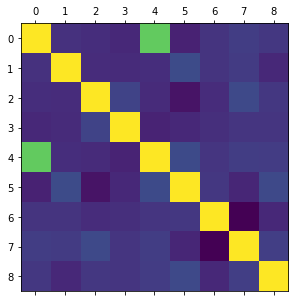

In [15]:
# plot the correlation matrix
plt.matshow(correlation)
plt.show()

In [16]:
# # perform variance analysis
# from sklearn.feature_selection import VarianceThreshold

# variance_threshold = VarianceThreshold(threshold=0.5)

# variance_threshold.fit(X_train)

# variance_threshold.get_support()

# # perform feature scaling
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)

# X_train_scaled

In [17]:
# split into training and testing data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33328, 9), (8332, 9), (33328, 1), (8332, 1))

In [18]:
y_train = y_train.values.ravel()

y_train

array([2, 0, 2, ..., 2, 0, 2], dtype=int64)

In [19]:
y_test = y_test.values.ravel()

y_test

array([2, 2, 1, ..., 2, 1, 0], dtype=int64)

In [20]:
# # do feature scaling on the training and testing data sets
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)

# X_test_scaled = scaler.transform(X_test)

# X_train_scaled

In [21]:
# use Random Forest  to train the model and make predictions and evaluate the model using the test data and print the accuracy

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy using Random Forest: {accuracy}')

Accuracy using Random Forest: 0.4985597695631301


In [22]:
# use XGBoost to train the model and make predictions and evaluate the model using the test data and print the accuracy

from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy using XGBoost: {accuracy}')

Accuracy using XGBoost: 0.5397263562169947


In [23]:
df_test = pd.read_csv('./data/X_test.csv')

df_test

,date,home_team,away_team,tournament,city,country,neutral
0,2023-09-06,Macau,Bhutan,Friendly,Taipa,Macau,False
1,1966-08-13,Malaysia,Vietnam Republic,Merdeka Tournament,Kuala Lumpur,Malaysia,False
2,1951-09-02,Suriname,Guyana,Friendly,Paramaribo,Suriname,False
3,2012-08-22,India,Syria,Nehru Cup,New Delhi,India,False
4,1973-12-15,Thailand,Myanmar,King's Cup,Bangkok,Thailand,False
...,...,...,...,...,...,...,...
4624,1966-10-02,Finland,Austria,UEFA Euro qualification,Helsinki,Finland,False
4625,1998-01-24,United States,Sweden,Friendly,Orlando,United States,False
4626,2007-05-25,Venezuela,Honduras,Friendly,Mérida,Venezuela,False
4627,2019-09-08,Sierra Leone,Liberia,FIFA World Cup qualification,Freetown,Sierra Leone,False


In [24]:
df_test['date'] = pd.to_datetime(df_test['date'])

df_test['day'] = df_test['date'].dt.day

df_test['month'] = df_test['date'].dt.month

df_test['year'] = df_test['date'].dt.year

df_test.drop('date', axis=1, inplace=True)

for col in categorical_features:
    df_test[col] = label_encoder.fit_transform(df_test[col])

df_test['neutral'] = df_test['neutral'].astype(int)

df_test

,home_team,away_team,tournament,city,country,neutral,day,month,year
0,140,28,62,806,127,0,6,9,2023
1,143,260,83,411,131,0,13,8,1966
2,227,103,62,612,203,0,2,9,1951
3,110,230,89,575,100,0,22,8,2012
4,238,160,74,70,213,0,15,12,1973
...,...,...,...,...,...,...,...,...,...
4624,82,15,116,329,74,0,2,10,1966
4625,251,228,62,599,225,0,24,1,1998
4626,256,106,62,554,231,0,25,5,2007
4627,213,135,60,277,189,0,8,9,2019


In [25]:
# df_test_scaled = scaler.transform(df_test)

# df_test_scaled

In [26]:
# make predictions on the test data using the Random Forest model
y_pred = random_forest.predict(df_test)

# save the row_id and result to a csv file
submission = pd.DataFrame({'row_id': range(0, len(y_pred)), 'result': y_pred})

submission.to_csv('./data/submission1.csv', index=False)

# make predictions on the test data using the XGBoost model

y_pred = xgb.predict(df_test)

# save the row_id and result to a csv file

submission = pd.DataFrame({'row_id': range(0, len(y_pred)), 'result': y_pred})

submission.to_csv('./data/submission2.csv', index=False)

In [27]:
# use SVM to train the model and make predictions and evaluate the model using the test data and print the accuracy

from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy using SVM: {accuracy}')

Accuracy using SVM: 0.485357657225156


In [28]:
# use AdaBoost to train the model and make predictions and evaluate the model using the test data and print the accuracy

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy using AdaBoost: {accuracy}')

Accuracy using AdaBoost: 0.4944791166586654


In [29]:
# make predictions on the test data using the AdaBoost model

y_pred = adaboost.predict(df_test)

# save the row_id and result to a csv file

submission = pd.DataFrame({'row_id': range(0, len(y_pred)), 'result': y_pred})

submission.to_csv('./data/submission3.csv', index=False)

In [30]:
# use KNN to train the model and make predictions and evaluate the model using the test data and print the accuracy

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy using KNN: {accuracy}')

Accuracy using KNN: 0.4510321651464234


In [33]:
# use a Neural Network to train the model and make predictions and evaluate the model using the test data and print the accuracy

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25, 10), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy using Neural Network: {accuracy}')

Accuracy using Neural Network: 0.485357657225156


In [32]:
# make predictions on the test data using the Neural Network model

y_pred = mlp.predict(df_test)

# save the row_id and result to a csv file

submission = pd.DataFrame({'row_id': range(0, len(y_pred)), 'result': y_pred})

submission.to_csv('./data/submission4.csv', index=False)

pearson correlation, vif and chi square test can be used to select the best features.